# Week 3 Assignment - Part 2 -  Data Sets

Team: Beshkia Kvarnstrom and Gabriel Castellanos

## INSTRUCTIONS
Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:
1. Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
Dataset.
2. Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html
3. What can you infer about the relationships between (1) the women, and (2) the social events?  
Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.


To analyze the relationships between the women and the social events in the given dataset, we can use the network analysis tools provided by the NetworkX library in Python. 

In [1]:
## Import the required libraries that will be used by the program
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import numpy as np
import warnings

In [2]:
%matplotlib inline

# Set the figure size and inline display for matplotlib plots.
plt.rcParams["figure.figsize"] = (14,14)

# Suppress the FutureWarning generated by the code.
warnings.filterwarnings("ignore", category=FutureWarning)

This code creates a bipartite graph using the Davis Southern Women dataset, davis_southern_women_graph() function provided by NetworkX. The graph consists of two sets of nodes: "women" and "clubs" (social events) and represents the attendance of 18 Southern Women at 14 social events. 


In [3]:
# Create the graph
G = nx.davis_southern_women_graph()

#Assign the top nodes to the women variable and the bottom nodes to the clubs variable
women = G.graph["top"]
clubs = G.graph["bottom"]

In [4]:
# Compute and print the biadjacency matrix of the bipartite graph. 
# The biadjacency matrix is a sparse matrix that represents the connections between women and clubs.

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


We can also convert and view the above sparse matrix to a dense matrix

In [5]:
#compute the biadjacency matrix again and convert it to a dense matrix using toarray(). 
#The resulting dense matrix is stored in the biadj_dense variable, which can be used for further analysis.

biadj_matrix = bipartite.biadjacency_matrix(G, women, clubs)
biadj_dense = biadj_matrix.toarray()  # Convert the sparse matrix to a dense matrix
print(biadj_dense)

[[1 1 1 1 1 1 0 1 1 0 0 0 0 0]
 [1 1 1 0 1 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [1 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 1 1 1 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 0 1 1 1]
 [0 0 0 0 0 1 1 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0]]


## Projected graph with unweighted edges

The code below computes the projected graph with unweighted edges using bipartite.projected_graph() function and assigns it to the variable W. 

In this projection, the women nodes are connected if they share at least one common club. The edges in this projection are unweighted.

The projected graph represents the relationships between women based on their shared attendance at social events. The code then prints the number of friends (degree) for each woman in the projected graph by calculating the degree of each woman node in the projected graph..

In [6]:
# project bipartite with unweighted edges graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")

for w in women:
    print(f"{W.degree(w)} {w}")



#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


### Projected graph with weighted edges

The code below computes the projected graph with weighted edges using bipartite.weighted_projected_graph() function and assigns it to the variable W. 

The code then prints the number of friend meetings (weighted edges) each woman has by iterating over the women nodes and printing the degree (number of weighted edges) for each woman. The weight of an edge represents the number of common clubs between the women nodes.

This projected graph takes into account the frequency of shared attendance between women at social events. The code then prints the number of friend meetings (degree) for each woman, considering the weighted edges.


In [7]:
# project bipartite graph with weighted edges onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")

for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


 The code below visualizes the overall network diagram of the bipartite graph using the nx.draw() function from NetworkX and matplotlib.pyplot library.
 
The spring_layout algorithm is used to generate the node positions. The nodes are colored differently based on their bipartite attribute (women or clubs). The graph is drawn with labels, custom node colors, edge color, and node size.


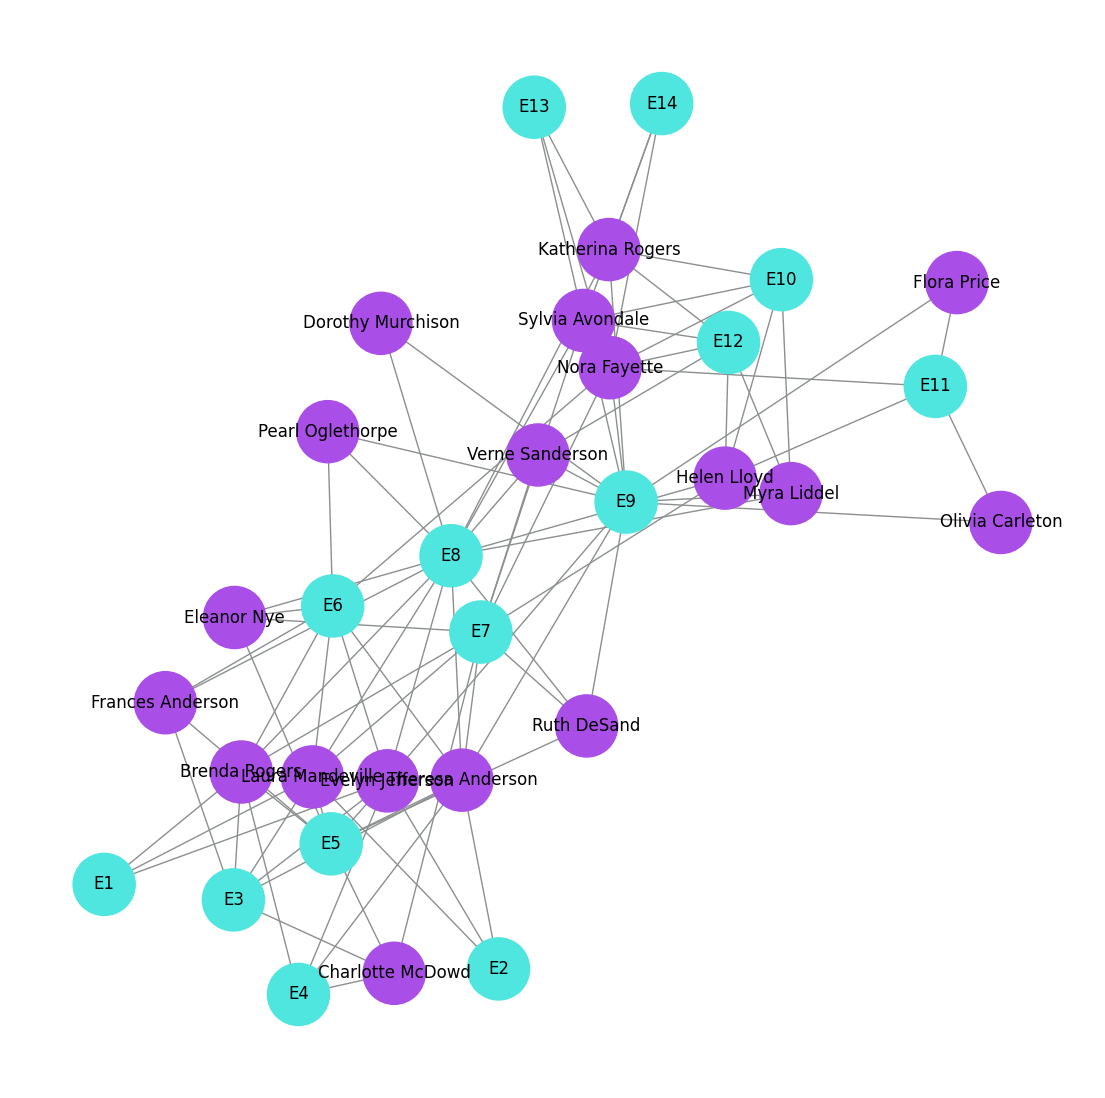

In [8]:
#View the network diagram
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions

colors = []
for node, data in G.nodes(data=True):
    if data['bipartite'] == 1:
        colors.append('#4ee6de')         
    else:
        colors.append('#a94ee6')
        
fig, ax = plt.subplots()  # Create a figure and an axis object
nx.draw(G, pos, ax=ax, with_labels=True, node_color=colors, edge_color="#8b8f8f", node_size=2000)  # Pass the axis object to nx.draw()
plt.show()


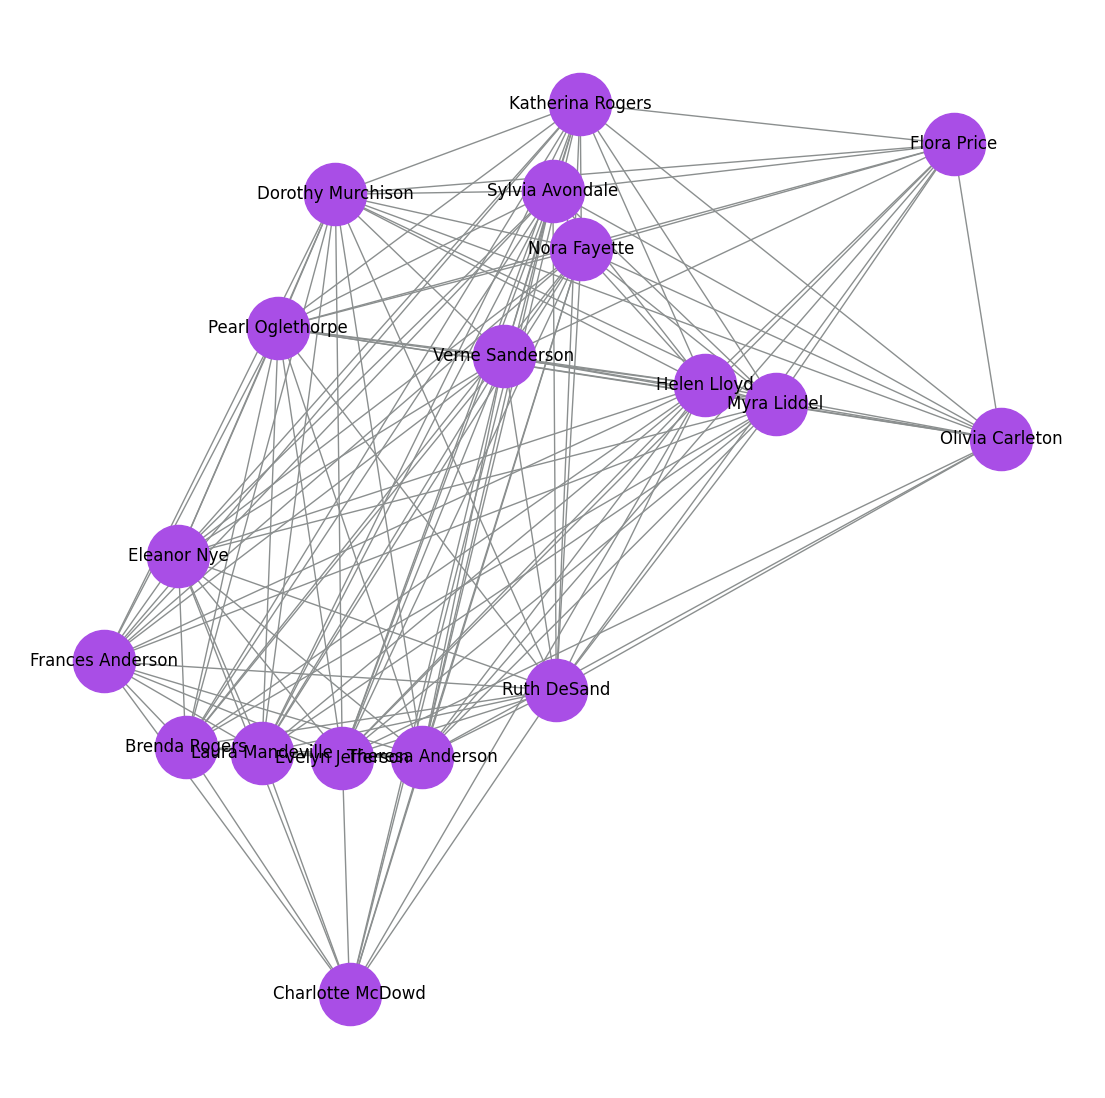

In [9]:
#View the Women's network diagram
fig, ax = plt.subplots()  # Create a figure and an axis object
nx.draw(W, pos, ax=ax, with_labels=True, node_color="#a94ee6", edge_color="#8b8f8f", node_size=2000)  # Pass the axis object to nx.draw()
plt.show()

In [10]:
# Display the clubs
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']


This code below computes the projected graph of clubs based on their shared attendance with women. The resulting graph is assigned to the variable C. The code then prints the attendance number (degree) for each club in the projected graph.

In [11]:
# project bipartite graph onto club nodes
C = bipartite.projected_graph(G, clubs)

print()
print("Attendance No., Clubs")

for c in clubs:
    print(f"{C.degree(c)} {c}")
    


Attendance No., Clubs
8 E1
8 E2
8 E3
8 E4
8 E5
13 E6
13 E7
13 E8
13 E9
8 E10
8 E11
8 E12
8 E13
8 E14



Compute the weighted projected graph of clubs, considering the frequency of shared attendance with women. The code prints the attendance number (degree) for each club, taking into account the weighted edges.

In [12]:
# project bipartite graph onto club nodes
# the degree computed is weighted and counts the total number of shared contacts
C = bipartite.weighted_projected_graph(G, clubs)
print()
print("Attendance No., Clubs")

for c in clubs:
    print(f"{C.degree(c, weight='weight')} {c}")


Attendance No., Clubs
19 E1
20 E2
32 E3
23 E4
38 E5
41 E6
48 E7
59 E8
46 E9
25 E10
13 E11
28 E12
18 E13
18 E14


This code visualizes the network diagram for the projected graph of clubs. The graph is drawn with labels, a specific node color, edge color, and node size.

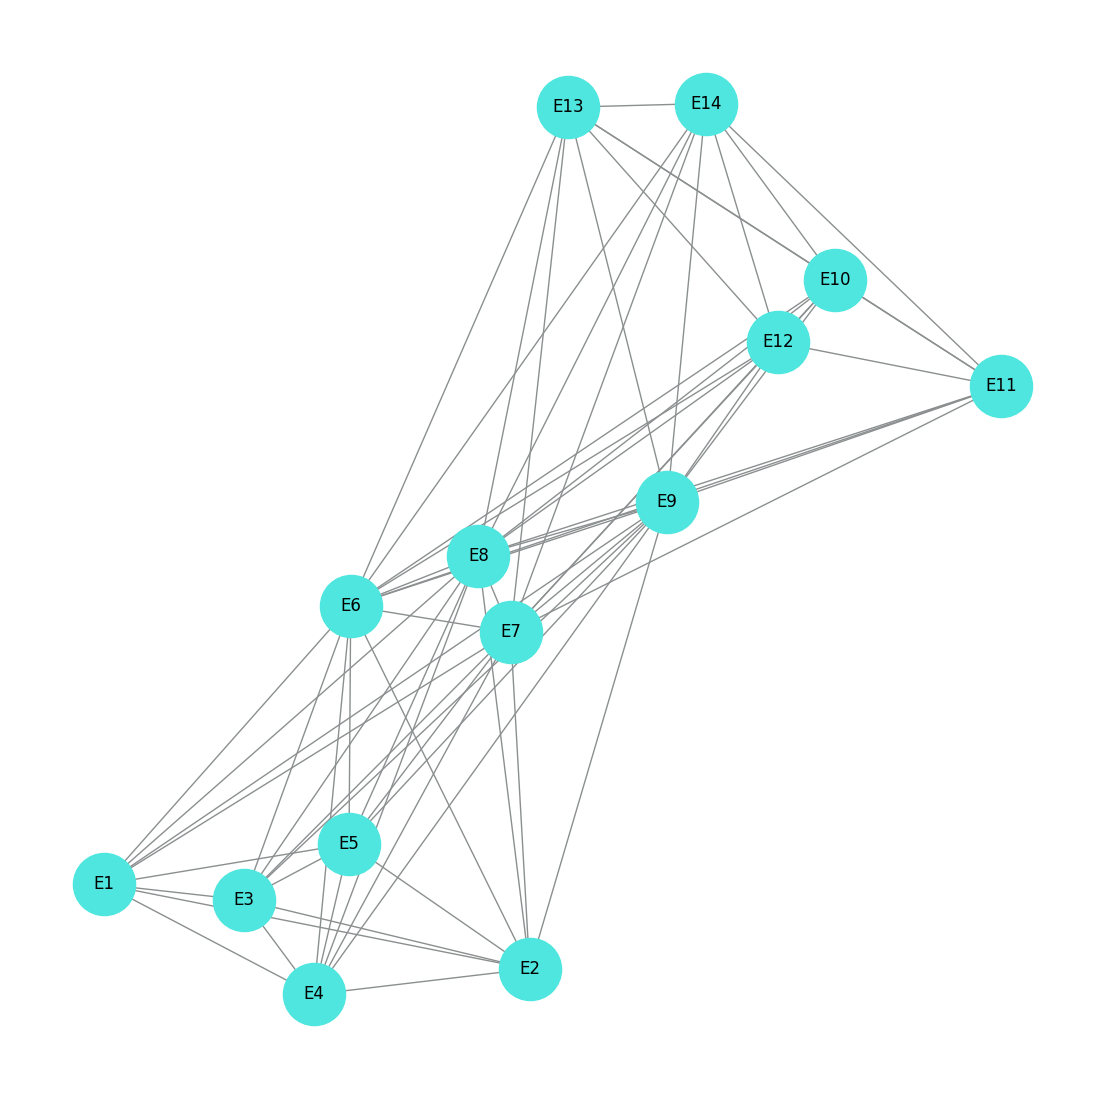

In [13]:
#View the Clubs's network diagram
fig, ax = plt.subplots()  # Create a figure and an axis object
nx.draw(C, pos, ax=ax, with_labels=True, node_color="#4ee6de", edge_color="#8b8f8f", node_size=2000)  # Pass the axis object to nx.draw()
plt.show()

What can you infer about the relationships between (1) the women

The dataset used depicts the attendance of 18 Southern Women at 14 social events. Each of these women is represented as a node and each social event is represented as an edge. This edge connects the women who attended the particular event. The presence or absence of an edge between two women indicates whether they attended the same event.

Based on the network dataset the following inferences about the relationships between the women can be made:

1. By creating the unweighted projected graph, we can see how the women are connected based on shared social events. The number of friends each woman has can be obtained from the degree of each woman node in the projected graph.

2. By creating the weighted projected graph, we can see the number of friend meetings (weighted edges) between the women. This represents the number of shared social events between pairs of women.

3. The presence of an edge between the two women indicates that they attended at least one social event together. The absence of an edge suggests that they did not attend any event together.

4. By examining the pattern of connections between women, we can identify groups or clusters of women who frequently attend events together. These clusters can suggest social circles or sub-communities within the larger network of women.

5. The overall connectivity of the women can indicate the level of social interaction within the group. If most women are connected in some way, it suggests a cohesive social network.



What can you infer about the relationships between (2) the social events?

We can infer the relationships between the social events by examining the connections between women in the projected graph. If two social events (clubs) have many women in common, it suggests that those events are attended by a similar group of women. The existence of edges between events suggests that there are women who consistently attend multiple events. This indicates a potential relationship or similarity between those events.

Conversely, if there are no edges between events, it suggests that the attendance patterns of women at different events are relatively distinct, with little overlap.

Analyzing the overall connectivity and structure of social events can provide insights into how different events are related and potentially form clusters or subgroups.
It is important to note that the dataset represents a small, specific network of women and events. To gain a more comprehensive understanding of the relationships, additional analysis techniques such as community detection algorithms or network centrality measures could be applied. Additionally, it would be helpful to have more information or context about the women and events to make more specific inferences about their relationships.

